In [27]:
import numpy as np
import mne
import sklearn
import pandas as pd
import glob
import os

In [43]:
path = 'E:\Diss\Paradigm\Participants\Warren\Labelled'
csv_files = glob.glob(path + "\speaking*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
speaking   = pd.concat(df_list, ignore_index=True)

In [44]:
speaking

,Time:256Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,...,T8,F8,AF4,FC6,F4,Channel 15,Channel 16,Label,Mode of Stimulus,Stage
0,41.000000,0,4249.102539,4246.922852,4240.769043,4263.461426,4236.153809,4241.153809,4232.692383,4280.641113,...,4248.846191,4234.102539,4250.641113,4234.230957,4114.358887,4247.820312,4243.974121,Lamp,audio,speaking10
1,41.003906,0,4280.384766,4245.128418,4249.871582,4239.102539,4251.410156,4236.153809,4113.974121,4246.538574,...,4240.769043,4262.436035,4236.538574,4247.179688,4232.948730,4281.025879,4242.563965,Lamp,audio,speaking10
2,41.007812,0,4246.025879,4237.051270,4236.922852,4258.717773,4234.615234,4244.871582,4232.307617,4281.794922,...,4248.846191,4245.384766,4250.000000,4236.410156,4107.051270,4246.153809,4236.666504,Lamp,audio,speaking10
3,41.011719,0,4281.922852,4238.846191,4248.077148,4242.820312,4249.358887,4235.000000,4105.000000,4246.538574,...,4230.000000,4253.974121,4231.153809,4239.230957,4233.974121,4281.410156,4240.512695,Lamp,audio,speaking10
4,41.015625,0,4246.922852,4241.153809,4231.538574,4256.025879,4232.563965,4239.871582,4236.538574,4281.410156,...,4247.692383,4233.846191,4248.461426,4234.615234,4107.820312,4247.563965,4243.717773,Lamp,audio,speaking10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665595,4501.980469,129,4234.358887,4224.102539,4283.589844,4228.205078,4228.717773,4223.846191,4226.666504,4246.153809,...,4244.871582,4218.333496,4241.025879,4240.000000,4204.615234,4235.512695,4224.871582,Clock,text,speaking9
665596,4501.984375,129,4247.692383,4236.153809,4240.641113,4217.820312,4242.436035,4239.102539,4206.153809,4236.922852,...,4280.897461,4231.538574,4231.666504,4218.461426,4226.538574,4248.846191,4237.692383,Clock,text,speaking9
665597,4501.988281,129,4237.563965,4229.230957,4280.897461,4233.589844,4232.948730,4217.563965,4224.615234,4248.461426,...,4232.051270,4217.307617,4244.487305,4238.974121,4205.897461,4237.051270,4230.512695,Clock,text,speaking9
665598,4501.992188,129,4246.922852,4240.000000,4230.384766,4217.436035,4241.025879,4239.871582,4203.846191,4235.512695,...,4281.282227,4236.794922,4233.589844,4220.384766,4218.717773,4245.000000,4238.589844,Clock,text,speaking9


In [47]:
speaking_mne = speaking.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Mode of Stimulus', 'Label', 'Stage'])

{'F3': array([-0.04908182,  0.06114545,  0.04584545]), 'F4': array([0.04908182, 0.06114545, 0.04584545]), 'O1': array([-0.02809091, -0.08646364,  0.        ]), 'O2': array([ 0.02809091, -0.08646364,  0.        ]), 'F7': array([-0.07354545,  0.05343636,  0.        ]), 'F8': array([0.07354545, 0.05343636, 0.        ]), 'T7': array([-0.09090909,  0.        ,  0.        ]), 'T8': array([0.09090909, 0.        , 0.        ]), 'P7': array([-7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'P8': array([ 7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'FC5': array([-0.07917273,  0.03066364,  0.03226364]), 'FC6': array([0.07917273, 0.03066364, 0.03226364]), 'AF3': array([-0.03636364,  0.08181818,  0.03909091]), 'AF4': array([0.03636364, 0.08181818, 0.03909091])}


C:\Users\ruthwik\AppData\Local\Temp\ipykernel_26452\3149716630.py:8: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  montage.plot()


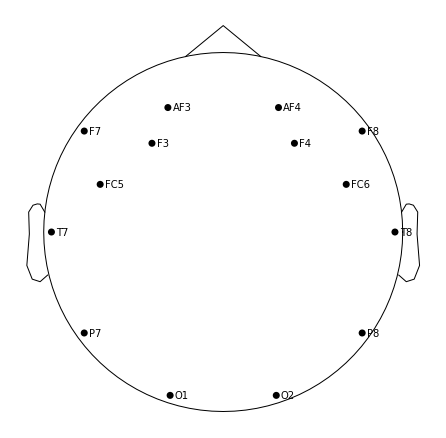

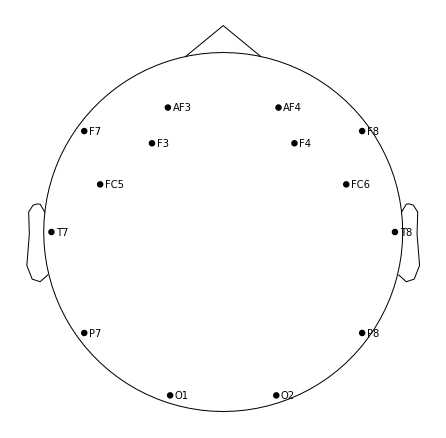

In [48]:
df = pd.read_csv('E:/Diss/Paradigm/14channelsDIG.txt')
ch_names = df.name.to_list()

pos = df[['x','y','z']].values/11 # Scale down to size
dig_ch_pos = dict(zip(ch_names,pos))
print(dig_ch_pos)
montage = mne.channels.make_dig_montage(ch_pos=dig_ch_pos)
montage.plot()

In [49]:
sfreq = 256
ch_names = list(speaking_mne.columns)
print(ch_names)
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = 'eeg')
raw_speaking = mne.io.RawArray(speaking_mne[ch_names].transpose(), info)
raw_speaking.set_montage(montage)
raw_speaking.info

['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']
Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


C:\Users\ruthwik\AppData\Local\Temp\ipykernel_26452\3968663541.py:6: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw_speaking.set_montage(montage)


<Info | 8 non-empty values
 bads: []
 ch_names: F3, FC5, AF3, F7, T7, P7, O1, O2, P8, T8, F8, AF4, FC6, F4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 14 items (14 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


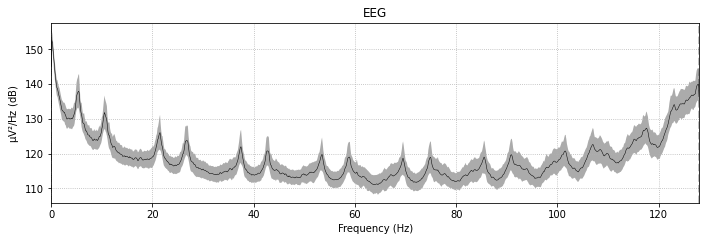

In [50]:
fig = raw_speaking.plot_psd(fmax=128, average=True)

for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

In [51]:
ssp_projectors = raw_speaking.info['projs']
print(ssp_projectors)
raw_speaking.del_proj()

[]


<RawArray | 14 x 665600 (2600.0 s), ~71.1 MB, data loaded>

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


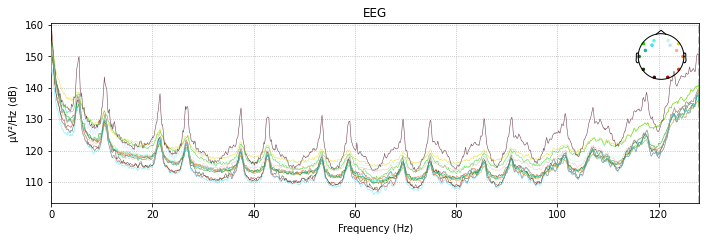

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
raw_speaking.plot_psd(fmax=128)

low_cut = 1
hi_cut  = 40

raw_speaking_filt = raw_speaking.copy().filter(low_cut, hi_cut)
raw_speaking_filt.plot_psd(fmax=128)

In [ ]:
raw_speaking.plot_psd(fmax=128)
raw_speaking.plot(duration=30, n_channels=14)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 7.3s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1300 matching events found
No baseline correction applied
0 projection items activated


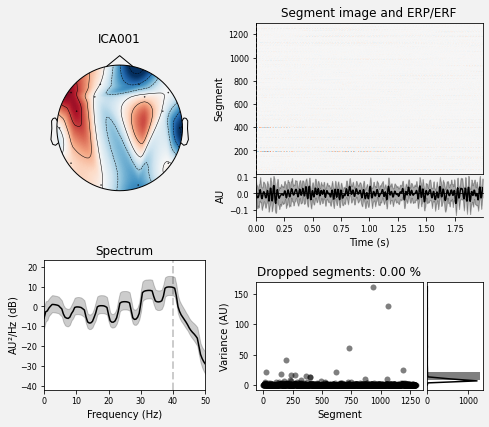

[<Figure size 504x432 with 6 Axes>]

In [46]:
# ica = mne.preprocessing.ICA(random_state=97, max_iter=800)
# ica.fit(raw_speaking_filt)
# ica.exclude = [1]  # details on how we picked these are omitted here
# ica.plot_properties(raw_speaking_filt, picks=ica.exclude)
ica = mne.preprocessing.ICA(n_components=14, random_state=97, max_iter=800)
ica.fit(raw_speaking_filt)
ica.exclude = [1]  # details on how we picked these are omitted here
ica.plot_properties(raw_speaking_filt, picks=ica.exclude)